In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize'] = 20,12

import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium

In [64]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [65]:
df = pd.read_csv('johns-hopkins-covid-19-daily-dashboard-cases-by-states.csv',parse_dates=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 10 columns):
fips              57 non-null float64
province_state    141 non-null object
country_region    141 non-null object
last_update       56 non-null object
lat               137 non-null float64
long              137 non-null float64
confirmed         141 non-null int64
deaths            141 non-null int64
recovered         141 non-null int64
active            141 non-null int64
dtypes: float64(3), int64(4), object(3)
memory usage: 11.1+ KB


## DESCRIPTION OF THE DATA



  The Data contains 141 rows and 10 columns with some columns containing missing values.some columns like last_update,fips needs to be dropped as it is irrevelant to the analysis. A column need to be added to aid analysis while the lat and long column contains missing values that needs to be filled.

In [67]:
df.head()

,fips,province_state,country_region,last_update,lat,long,confirmed,deaths,recovered,active
0,1.0,Alabama,US,2020-04-05 18:24:35,32.3182,-86.9023,1716,45,0,0
1,2.0,Alaska,US,2020-04-05 18:24:35,61.3707,-152.4044,171,5,0,0
2,4.0,Arizona,US,2020-04-05 18:24:35,33.7298,-111.4312,2486,64,0,0
3,5.0,Arkansas,US,2020-04-05 18:24:35,34.9697,-92.3731,819,14,0,0
4,6.0,California,US,2020-04-05 18:24:35,36.1162,-119.6816,14036,325,0,0


In [68]:
df.drop(['fips'],axis='columns',inplace=True)

In [69]:
df.head()

,province_state,country_region,last_update,lat,long,confirmed,deaths,recovered,active
0,Alabama,US,2020-04-05 18:24:35,32.3182,-86.9023,1716,45,0,0
1,Alaska,US,2020-04-05 18:24:35,61.3707,-152.4044,171,5,0,0
2,Arizona,US,2020-04-05 18:24:35,33.7298,-111.4312,2486,64,0,0
3,Arkansas,US,2020-04-05 18:24:35,34.9697,-92.3731,819,14,0,0
4,California,US,2020-04-05 18:24:35,36.1162,-119.6816,14036,325,0,0


In [70]:
df.tail()

,province_state,country_region,last_update,lat,long,confirmed,deaths,recovered,active
136,Yukon,Canada,NaN,64.2823,-135.0000,6,0,0,0
137,Yunnan,China,NaN,24.9740,101.4870,184,2,172,10
138,Zhejiang,China,NaN,29.1832,120.0934,1263,1,1230,32
139,Diamond Princess,Canada,NaN,NaN,NaN,0,1,0,0
140,Grand Princess,Canada,NaN,NaN,NaN,13,0,0,0


In [71]:
df.isnull().sum()

province_state     0
country_region     0
last_update       85
lat                4
long               4
confirmed          0
deaths             0
recovered          0
active             0
dtype: int64

In [72]:
df.drop(['last_update'],axis='columns',inplace=True)

In [73]:
df.head()

,province_state,country_region,lat,long,confirmed,deaths,recovered,active
0,Alabama,US,32.3182,-86.9023,1716,45,0,0
1,Alaska,US,61.3707,-152.4044,171,5,0,0
2,Arizona,US,33.7298,-111.4312,2486,64,0,0
3,Arkansas,US,34.9697,-92.3731,819,14,0,0
4,California,US,36.1162,-119.6816,14036,325,0,0


In [74]:
df['total_active_cases'] = df['confirmed'] -df['deaths'] - df['recovered']

In [75]:
df.drop(['active'],axis='columns',inplace=True)

In [76]:
df.head()

,province_state,country_region,lat,long,confirmed,deaths,recovered,total_active_cases
0,Alabama,US,32.3182,-86.9023,1716,45,0,1671
1,Alaska,US,61.3707,-152.4044,171,5,0,166
2,Arizona,US,33.7298,-111.4312,2486,64,0,2422
3,Arkansas,US,34.9697,-92.3731,819,14,0,805
4,California,US,36.1162,-119.6816,14036,325,0,13711


In [77]:
df.style.background_gradient(cmap='Reds')

C:\Users\QUDUS\Anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning:

invalid value encountered in less



,province_state,country_region,lat,long,confirmed,deaths,recovered,total_active_cases
0,Alabama,US,32.3182,-86.9023,1716,45,0,1671
1,Alaska,US,61.3707,-152.404,171,5,0,166
2,Arizona,US,33.7298,-111.431,2486,64,0,2422
3,Arkansas,US,34.9697,-92.3731,819,14,0,805
4,California,US,36.1162,-119.682,14036,325,0,13711
5,Colorado,US,39.0598,-105.311,4565,126,0,4439
6,Connecticut,US,41.5978,-72.7554,5276,165,0,5111
7,Delaware,US,39.3185,-75.5071,593,14,0,579
8,Diamond Princess,US,35.4437,139.638,49,0,0,49
9,District of Columbia,US,38.8974,-77.0268,998,22,0,976


In [78]:
Total_active_cases = df.groupby('country_region')['total_active_cases'].sum().sort_values(ascending=False).to_frame()

In [79]:
Total_active_cases.index


Index(['US', 'Canada', 'Australia', 'China', 'France', 'United Kingdom',
       'Denmark', 'Netherlands'],
      dtype='object', name='country_region')

In [80]:
Total_active_cases.style.background_gradient(cmap='Reds')

,total_active_cases
country_region,
US,299098
Canada,11167
Australia,4895
China,2062
France,741
United Kingdom,497
Denmark,90
Netherlands,85


In [82]:
df.iplot(kind='bar',x='country_region',y='total_active_cases')

## ANALYSIS OF THE SPREAD OF THE VIRUS IN US AND MEASURES TO REDUCE IT.


In [83]:
usa = df[df['country_region'] == 'US']

In [84]:
usa = usa.dropna(how='any')

In [85]:
usa_cases = usa.groupby('province_state')['total_active_cases'].sum().sort_values(ascending=False).to_frame()

In [86]:
usa_cases.style.background_gradient(cmap='Blues')

,total_active_cases
province_state,
New York,117897
New Jersey,33278
California,13711
Michigan,13685
Louisiana,12533
Florida,11933
Massachusetts,11520
Pennsylvania,11384
Illinois,10115


In [87]:
map=folium.Map(location=[39.381266,-97.922211],zoom_start=2,tiles='Stamenterrain')

for lat,long,value, name in zip(usa['lat'],usa['long'],usa['total_active_cases'],usa['province_state']):
    folium.CircleMarker([lat,long],radius=value/550,popup=('<strong>total_active_cases</strong>: '+str(name).capitalize()+'<br>''<strong>total_active_cases</strong>: ' + str(value)+ '<br>'),color='red',fill_opacity=0.3,fill_color='red').add_to(map)

In [121]:
map

## Result from Analysis

***The outcome of the analysis shows the cases are severe in North America than in South America.More than 250,000 cases has been recorded in US and with New york having the highest record of active cases in the US.The solution I recommend from the outcome of analysis is to strictly restrict movements outside the northern region of the US and into this region.There should be more medical facilities distributed in the area to attend to the pressing issue.The southern part of America has lesser number of cases, so there should be a method devised to stop further spread.On that I recommend those not affected should be kept at home and seperated from those affected.***


## Why should we stay at home

***I will show in this analysis how the death cases are increasing on a daily basis.***

In [53]:
df2 = pd.read_csv('2019-novel-coronavirus-covid-19-2019-ncov-data-repository-deaths.csv')

In [54]:
df2.head()

,province_state,country_region,lat,long,date,deaths
0,NaN,Afghanistan,33,65,2020-01-22,0
1,NaN,Afghanistan,33,65,2020-01-23,0
2,NaN,Afghanistan,33,65,2020-01-24,0
3,NaN,Afghanistan,33,65,2020-01-25,0
4,NaN,Afghanistan,33,65,2020-01-26,0


In [89]:
df2.drop(['province_state'],axis='columns',inplace=True)

In [110]:
df2['country_region'].value_counts()

China                     2310
Canada                    1050
United Kingdom             700
France                     700
Australia                  560
Netherlands                280
Denmark                    210
Belize                      70
Grenada                     70
Burma                       70
Cyprus                      70
Sudan                       70
Spain                       70
India                       70
Finland                     70
Thailand                    70
Somalia                     70
Switzerland                 70
Kenya                       70
Laos                        70
Israel                      70
Slovenia                    70
Luxembourg                  70
Malaysia                    70
Czechia                     70
Bangladesh                  70
Dominican Republic          70
Colombia                    70
Ukraine                     70
Russia                      70
                          ... 
Philippines                 70
Iceland 

In [91]:
df2.set_index('date',inplace=True)

In [97]:
df2.reset_index(inplace=True)

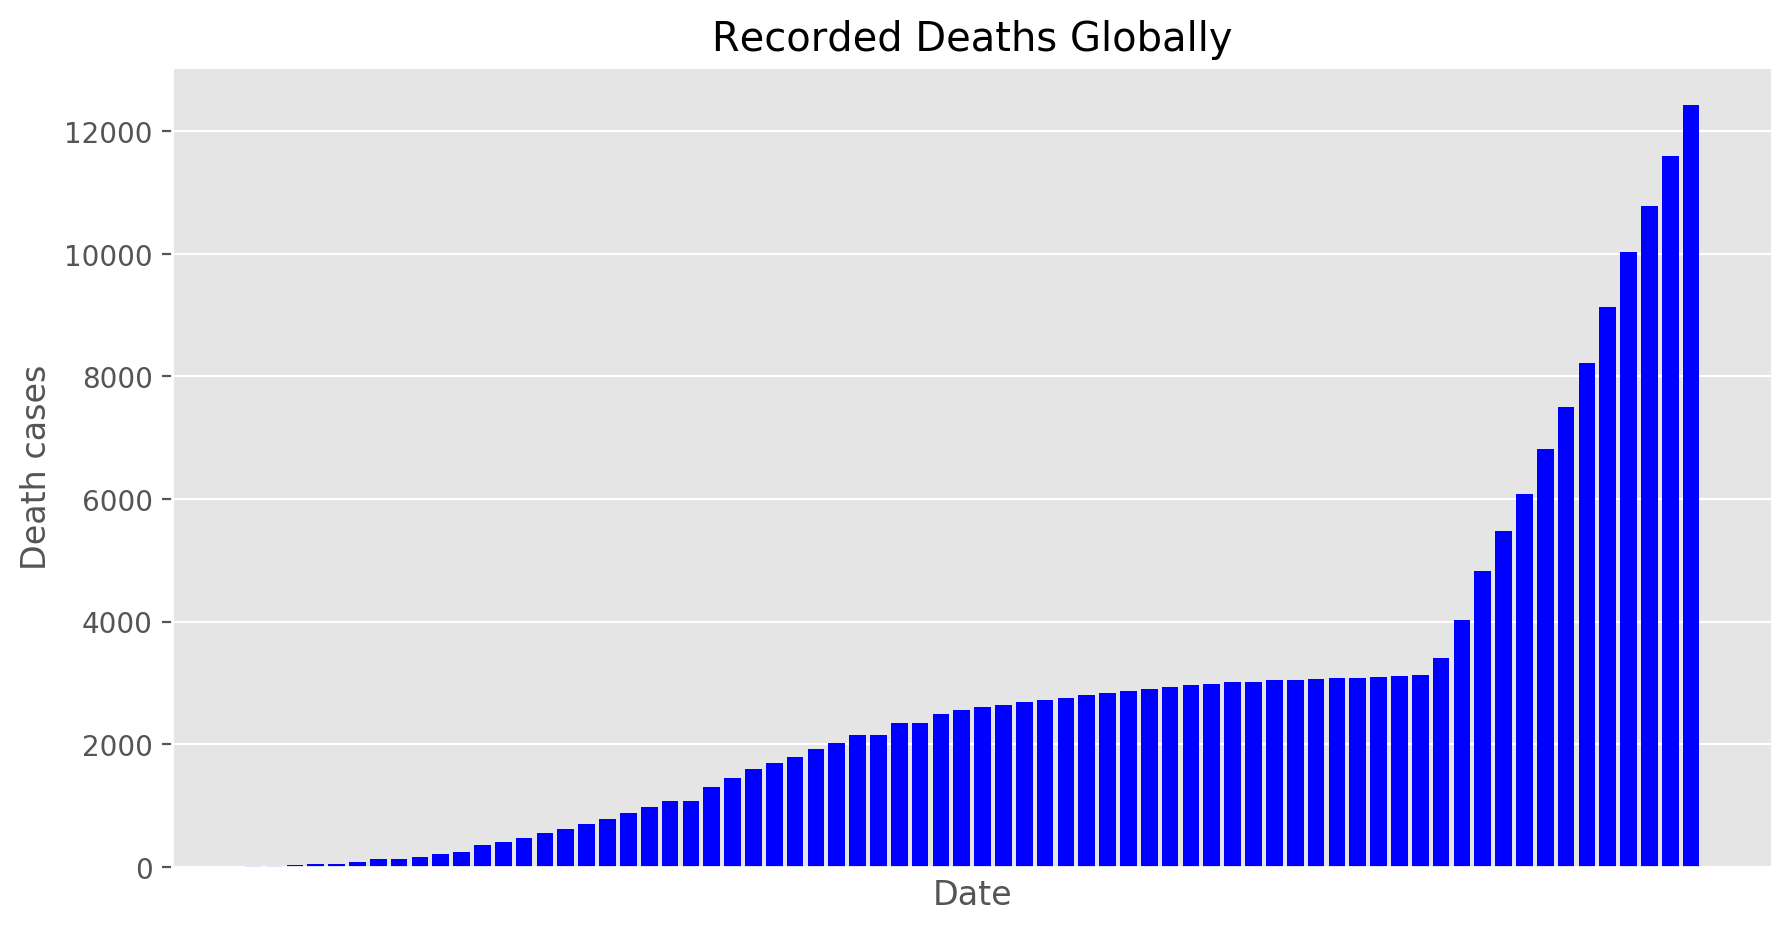

In [107]:
#matplotlib vis

fig = plt.figure(figsize=(10,5),dpi=200)
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(df2['date'],df2['deaths'],color='blue',)
axes.set_xlabel('Date')
axes.set_ylabel('Death cases')
axes.set_title('Recorded Deaths Globally')
axes.set_xticks([90])
plt.show()

In [109]:
#plotly vis

fig =px.bar(df2,x='date',y='deaths',color='deaths',title='Recorded Death Cases Globally',)
fig.show()

## Result from Analysis
***The analysis shows that there are more death cases recorded on daily basis, so the virus is deadly and we need to take necessary precautions and abide by the law to stay at home. Also, we should follow all medical instructions as regards staying safe.***